# Avatar : The Last Airbender

### Machine Learning and Analysis of the show

In [1]:
from IPython.display import Image
Image (filename = "images (1).jpg")

## Introduction :

**Avatar: The Last Airbender (Avatar: The Legend of Aang in some regions)** is an American animated television series created by Michael Dante DiMartino and Bryan Konietzko, with Aaron Ehasz as head writer. It aired on Nickelodeon for three seasons, from February 2005 to July 2008. Avatar is set in an Asiatic-like world in which some people can manipulate one of the four elements—water, earth, fire, or air—with telekinetic variants of the Chinese martial arts known as "bending". The only individual who can bend all four elements, the "Avatar", is responsible for maintaining harmony between the world's four nations, and serves as the bridge between the spirit world and the physical world. The show is presented in a style that combines anime with American cartoons, and relies on the imagery of mainly East Asian culture, with some South Asian, New World, and Inuit and Sireniki influences.


The series is centered around the journey of 12-year-old Aang, the current Avatar and last survivor of his nation, the Air Nomads, along with his friends Sokka, Katara, and later Toph, as they strive to end the Fire Nation's war against the other nations of the world. It also follows the story of Zuko—the exiled prince of the Fire Nation, seeking to restore his lost honor by capturing Aang, accompanied by his wise uncle Iroh—and later, that of his ambitious sister Azula.

In [2]:
import pandas as pd
import numpy as np

import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from plotly.offline import init_notebook_mode
init_notebook_mode()

In [3]:
data = pd.read_csv('avatar_data.csv')
series = pd.read_csv('series_names.csv')
avatar = pd.read_csv('avatar.csv', encoding = 'latin-1')

In [4]:
avatar['imdb_rating'] = avatar['imdb_rating'].fillna(9.7)

### IMDB Ratings Across Seasons :

In [5]:
fig = px.bar(series, x = 'book', y = 'series_rating', template = 'simple_white', color_discrete_sequence=['#f18930'] * 3 ,
             opacity = 0.6, text = 'series_rating', category_orders={'book':['Water','Earth','Fire']}, 
            title = 'IMDB Rating Across Seasons')
fig.add_layout_image(
        dict(
            source="https://i.imgur.com/QWoqOZd.jpg",
            xref="x",
            yref="y",
            x=-0.5,
            y=10,
            sizex=3,
            sizey=10,
            opacity = 0.7,
            sizing="stretch",
            layer="below")
)
fig.show()

### IMDB ratings on each seasons :

In [6]:
fig = px.bar(data, x = 'Unnamed: 0', y = 'imdb_rating',color = 'book',hover_name='book_chapt',template = 'simple_white',
             color_discrete_map={'Fire':'#cd0000', 'Water':'#3399ff', 'Earth':'#663307'},labels={'imdb_rating':'IMDB Ratig','Unnamed: 0':'Episode'})
fig.show()

### Directors and their average ratings :

In [7]:
director_counts = pd.DataFrame(data['director'].value_counts()).reset_index()
director_counts.columns = ['Director Name', 'Number of Episdoes']

fig = make_subplots(rows=1, cols=2,specs=[[{'type':'bar'}, {'type':'pie'}]], horizontal_spacing=0.1)

director_rating = pd.DataFrame(data.groupby('director')['imdb_rating'].mean()).reset_index().sort_values(by = 'imdb_rating')
trace0 = go.Bar(y = director_rating['director'], x = director_rating['imdb_rating'], orientation='h',hovertext=director_rating['imdb_rating'],name = 'Director Average Ratings')
fig.add_trace(trace0, row = 1, col = 1)

trace1 = go.Pie(values= director_counts['Number of Episdoes'],labels = director_counts['Director Name'],name = 'Director Number of Episodes')
fig.add_trace(trace1, row = 1, col = 2)

fig.update_layout(showlegend = False, title = {'text':'Directors and Their Average Rating', 'x':0.5})
fig.show()

### Famous Characters and their popularity :

In [8]:
character_dialogues = pd.DataFrame({'Character':[], 'Number of Dialogues':[],'Book' : []})
for book in ['Water', 'Earth', 'Fire']:
    temp = pd.DataFrame(avatar[avatar['book'] == book]['character'].value_counts()).reset_index()
    temp.columns = ['Character', 'Number of Dialogues']
    temp['Book'] = book
    temp = temp.sort_values(by = 'Number of Dialogues', ascending = False)
    character_dialogues = pd.concat([character_dialogues, temp])

In [9]:
important_characters = ['Aang', 'Katara', 'Zuko', 'Sokka','Toph','Iroh','Azula']

In [10]:
bookColor = {
    'Fire':'#cd0000', 
    'Water':'#3399ff', 
    'Earth':'#663307'
}
fig = make_subplots(rows = 1, cols = 3, subplot_titles=['Water','Earth','Fire'])
for i, book in enumerate(['Water','Earth', 'Fire']):
    temp = character_dialogues[(character_dialogues['Character'] != 'Scene Description') & (character_dialogues['Book'] == book)]
    trace = go.Bar(x = temp.iloc[:10][::-1]['Number of Dialogues'].values, y = temp.iloc[:10][::-1]['Character'].values,
                   orientation = 'h', marker_color = bookColor[book], name = book,opacity=0.8)
    fig.add_trace(trace, row = 1, col = i+1)
fig.update_layout(showlegend = False, template = 'plotly_white', title = 'Characters with Most Dialogues in Each Book')
fig.show()

### Famous Characters with number of dialouges in each season :

In [11]:
fig = px.bar(character_dialogues[character_dialogues['Character'].isin(important_characters)],template = 'gridon',title = 'Important Characters Number of Dialogues each season',
             x = 'Number of Dialogues', y = 'Character', orientation = 'h', color='Book',barmode = 'group',
             color_discrete_map={'Fire':'#cd0000', 'Water':'#3399ff', 'Earth':'#663307'})
fig.add_layout_image(
    dict(
        source="https://vignette.wikia.nocookie.net/avatar/images/1/12/Azula.png",
        x=0.25,
        y=0.9,
    ))
fig.add_layout_image(
    dict(
        source="https://vignette.wikia.nocookie.net/avatar/images/4/46/Toph_Beifong.png",
        x=0.42,
        y=0.77,
    ))
fig.add_layout_image(
    dict(
        source="https://vignette.wikia.nocookie.net/avatar/images/c/c1/Iroh_smiling.png",
        x=0.35,
        y=0.6,
    ))
fig.add_layout_image(
    dict(
        source="https://vignette.wikia.nocookie.net/avatar/images/4/4b/Zuko.png",
        x=0.62,
        y=0.47,
    ))

fig.add_layout_image(
    dict(
        source="https://vignette.wikia.nocookie.net/avatar/images/c/cc/Sokka.png",
        x=0.85,
        y=0.32,
    ))
fig.add_layout_image(
    dict(
        source="https://static.wikia.nocookie.net/loveinterest/images/c/cb/Avatar_Last_Airbender_Book_1_Screenshot_0047.jpg",
        x=0.85,
        y=0.18,
    ))
fig.add_layout_image(
    dict(
        source="https://comicvine1.cbsistatic.com/uploads/scale_small/11138/111385676/7212562-5667359844-41703.jpg",
        x=1.05,
        y=0.052,
    ))
fig.update_layout_images(dict(
        xref="paper",
        yref="paper",
        sizex=0.09,
        sizey=0.09,
        xanchor="right",
        yanchor="bottom"
))

fig.show()

### Top 20 Episodes with most number of dialogues :

In [12]:
chapter_dialogues = pd.DataFrame({'Chapter':[], 'Number of Dialogues':[],'Book' : []})
dialogue_df = avatar[avatar['character']!='Scene Description']
for book in ['Water', 'Earth', 'Fire']:
    temp = pd.DataFrame(dialogue_df[(dialogue_df['book'] == book)]['chapter'].value_counts()).reset_index()
    temp.columns = ['Chapter', 'Number of Dialogues']
    temp['Book'] = book
    chapter_dialogues = pd.concat([chapter_dialogues, temp])
chapter_dialogues = chapter_dialogues.sort_values(by = 'Number of Dialogues')

In [13]:
colors = []
for i in range(20):
    if(chapter_dialogues.iloc[i]['Book'] == 'Fire'):
        colors.append('#cd0000')
    elif(chapter_dialogues.iloc[i]['Book'] == 'Water'):
        colors.append('#3399ff')
    else:
        colors.append('#663307')
trace = go.Bar(x = chapter_dialogues.iloc[:20]['Number of Dialogues'], y = chapter_dialogues.iloc[:20]['Chapter'], 
               orientation = 'h', marker_color = colors)
fig = go.Figure([trace])
fig.update_layout(title = {'text':'Top 20 Episodes with the Most Number of Dialogues', 'x':0.5},
                 xaxis_title="Number of Dialogues",
                 yaxis_title="Chapter Name",
                 template = 'plotly_white')
fig.show()

In [14]:
ratings = []
for i in range(len(chapter_dialogues)):
    chapter = chapter_dialogues.iloc[i]['Chapter']
    imdb_rating = avatar[avatar['chapter'] == chapter]['imdb_rating'].mean()
    ratings.append(imdb_rating)
chapter_dialogues['IMDB Rating'] = ratings
chapter_dialogues['IMDB Rating'].fillna(9.7, inplace = True)

In [15]:
chapter_dialogues['Dialogues Per Rating'] = chapter_dialogues['Number of Dialogues'] / chapter_dialogues['IMDB Rating']
chapter_dialogues = chapter_dialogues.sort_values(by = 'Dialogues Per Rating')

### Top 20 episodes with the Least dialogues per rating :

In [16]:
colors = []
for i in range(20):
    if(chapter_dialogues.iloc[i]['Book'] == 'Fire'):
        colors.append('#cd0000')
    elif(chapter_dialogues.iloc[i]['Book'] == 'Water'):
        colors.append('#3399ff')
    else:
        colors.append('#663307')
trace = go.Bar(x = chapter_dialogues.iloc[:20]['Dialogues Per Rating'], y = chapter_dialogues.iloc[:20]['Chapter'],
              text = chapter_dialogues.iloc[:20]['IMDB Rating'], orientation = 'h', marker_color = colors, 
              textposition="outside",texttemplate='%{text:.2s}',
              textfont=dict(
              family="sans serif",
              size=18,
              color="Black")
)
fig = go.Figure([trace])
fig.update_layout(title = {'text':'Top 20 Episodes with the Least Dialogues Per Rating', 'x':0.5},
                 xaxis_title="Num of Dialogues / IMDB Rating",
                 yaxis_title="Chapter Name",
                 template = 'plotly_white')
fig.show()

### Relation between Number of Dialogues and IMDb rating :

In [17]:
fig  = px.scatter(chapter_dialogues, x = 'Number of Dialogues', y = 'IMDB Rating', trendline = 'ols', color = 'Book',
                 color_discrete_map={'Fire':'#cd0000', 'Water':'#3399ff', 'Earth':'#663307'},hover_name='Chapter' ,template = 'plotly_white',
                 title = 'Relation Between Number of Dialogues and IMDB Rating')
fig.show()

In [18]:
stopwords = set(STOPWORDS)
def createCorpus(character_name):
    df = avatar[avatar['character'] == character_name]
    corpus = ""
    for des in df['character_words'].to_list():
        corpus += des
    return corpus

def generateWordCloud(character_name, background_color):
    plt.subplots(figsize=(12,8))
    corpus = createCorpus(character_name)
    wordcloud = WordCloud(background_color=background_color,
                          contour_color='black', contour_width=4, 
                          stopwords=stopwords,
                          width=1500, margin=10,
                          height=1080
                         ).generate(corpus)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Most used words by Aang :

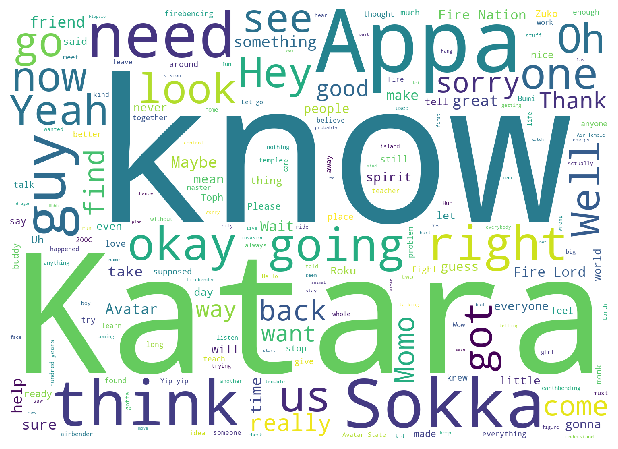

In [19]:
generateWordCloud('Aang', 'White')

### Most used words by Katara :

In [20]:
generateWordCloud('Katara', 'LightBlue')

### Most used words by Sokka :

In [21]:
generateWordCloud('Sokka','Blue')

### Most used words by Toph :

In [22]:
generateWordCloud('Toph','Brown')

### Most used words by Zuko :

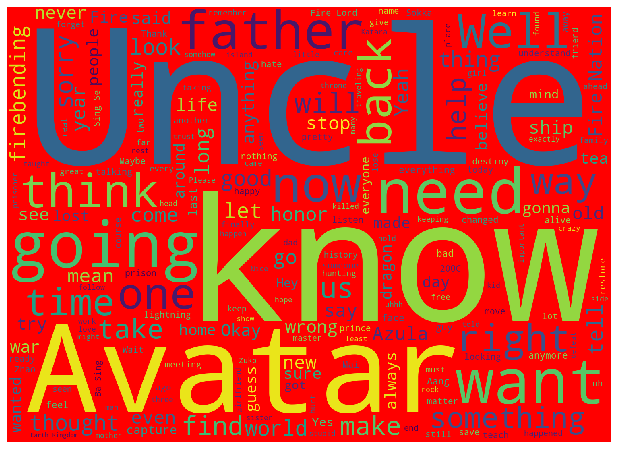

In [23]:
generateWordCloud('Zuko', 'Red')

### Most used words by Iroh :

In [24]:
generateWordCloud('Iroh', 'Pink')

### Most used words by Azula :

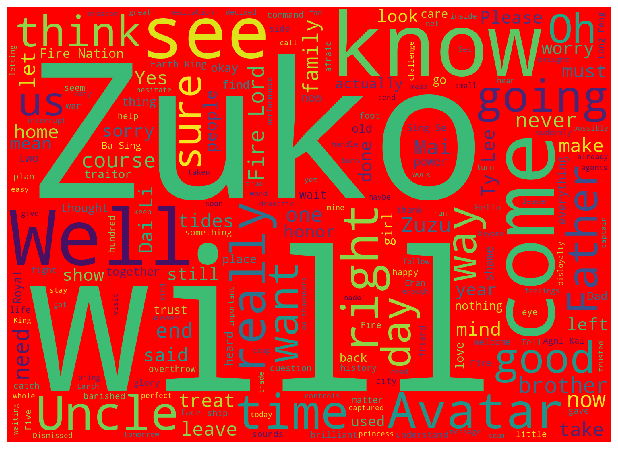

In [25]:
generateWordCloud('Azula','Red')

In [26]:
sentInt = SentimentIntensityAnalyzer()
def get_vader_score(character_name, key = 'pos'):
    corpus = createCorpus(character_name)
    sentimentScore = sentInt.polarity_scores(corpus)
    return sentimentScore[key]


character_sent_dict = {}
for sentiment in ['pos', 'neg', 'neu']:
    char_sents = []
    for character in important_characters:
        char_sents.append(get_vader_score(character, key = sentiment))
    character_sent_dict[sentiment] = char_sents
character_sent_dict['Character Name'] = important_characters
character_sentiments = pd.DataFrame(character_sent_dict)

### Sentiment Analysis of Characters :

In [27]:
fig = px.bar(character_sentiments, x = ['pos', 'neg','neu'], y = 'Character Name',barmode='group',
             labels = {'pos':'Positive', 'neg':'Negative','neu':'Neutral', 'value':'Sentiment Score'},
             title = 'Sentiment Analysis of Characters',
             template = 'presentation')
fig.show()

In [28]:
chapterCorpus = pd.DataFrame({'Chapter Name' : [], 'Full Text': [], 'Book' : []})
chapters = []
chapterTexts = []
books = []
for book in ['Water', 'Earth', 'Fire']:
    subBook = avatar[(avatar['book'] == book) & (avatar['character']!='Scene Description')]
    for chapter_name, df in subBook.groupby('chapter'):
        full_text = df['character_words'].values
        chapters.append(chapter_name)
        chapterTexts.append(" ".join(full_text).lower())
        books.append(book)
chapterCorpus['Chapter Name'] = chapters
chapterCorpus['Full Text'] = chapterTexts
chapterCorpus['Book'] = books

### Finding Similar Episodes :

In [29]:
vectorizer = TfidfVectorizer(stop_words=['english'])
vectorizedCorpus = vectorizer.fit_transform(chapterCorpus['Full Text'])
svd = TruncatedSVD(n_components=2,random_state=0)
reducedVector = svd.fit_transform(vectorizedCorpus)
chapterCorpus['Dimension 1'] = reducedVector[:,0]
chapterCorpus['Dimension 2'] = reducedVector[:,1]
fig = px.scatter(chapterCorpus, x = 'Dimension 1', y = 'Dimension 2', color = 'Book', hover_name='Chapter Name',
                color_discrete_map={'Fire':'#cd0000', 'Water':'#3399ff', 'Earth':'#663307'},
                title = 'Finding Similar Episodes',
                template = 'plotly_white')
fig.show()

In [30]:
chapterwise_dialogues = pd.DataFrame({})
for character in important_characters:
    character_df = avatar[avatar['character'] == character]
    chapter_counts = character_df.groupby('chapter').size().reset_index()
    chapter_counts.columns = ['chapter','Num of Dialogues']
    imdb_ratings = character_df.groupby('chapter')['imdb_rating'].mean().reset_index()
    dialogues_and_rating = pd.merge(chapter_counts, imdb_ratings)
    dialogues_and_rating['Character'] = character
    chapterwise_dialogues = pd.concat([chapterwise_dialogues, dialogues_and_rating])

### Character wise Dialogues rating :

In [31]:
fig = px.scatter(chapterwise_dialogues, 
                 x = 'chapter',y='imdb_rating', size='Num of Dialogues',
                 facet_col='Character',facet_col_wrap=2, 
                template = 'plotly_white')
fig.update_xaxes(matches = None,visible = False)
fig.show()

### Conclusion :


**Avatar: The Last Airbender** was the highest-rated animated television series in its demographic at its premiere; an average of 3.1 million viewers watched each new episode. It had 5.6 million viewers for its highest-rated episode and was a highly rated part of the Nicktoons lineup beyond its 6-to-11-year-old target demographic. A one-hour special, The Secret of the Fire Nation, consisting of the episodes "The Serpent's Pass" and "The Drill", aired on September 15, 2006, and attracted 5.1 million viewers. According to the Nielsen Media Research, the special was the highest-rated cable-television program that week. In 2007, Avatar: The Last Airbender was syndicated to more than 105 countries and was one of Nickelodeon's top-rated programs. The series ranked first on Nickelodeon in Germany, Indonesia, Malaysia, the Netherlands, Belgium, and Colombia.


The four-part series finale, "Sozin's Comet", had the series' highest ratings. Its first airing averaged 5.6 million viewers, 95 percent more than Nickelodeon had in mid-July 2007. During the week of July 14, it was the most-viewed program by the under-14 demographic. The finale's popularity was reflected in online media; Rise of the Phoenix King, a Nick.com online game based on "Sozin's Comet", had almost 815,000 game plays in three days. IGN ranked the series 35th on its list of top 100 animated TV shows.

In [32]:
from IPython.display import HTML
html1 = '<img src="a.jpg" width="1000" height="1000" align="center"/>'
HTML(html1)

### Thank You! :) 